<a href="https://colab.research.google.com/github/Hessah778/ProjectML/blob/main/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()

data = open('/content/ea1.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'بن': 1, 'أخبرنا': 2, 'الله': 3, 'عن': 4, 'من': 5, 'قال': 6, 'في': 7, 'أبو': 8, 'أن': 9, 'لا': 10, 'بكر': 11, 'عليه': 12, 'عبد': 13, 'محمد': 14, 'به': 15, 'على': 16, 'ما': 17, 'العلم': 18, 'أبي': 19, 'ولا': 20, 'إلى': 21, 'عنه': 22, 'صلى': 23, 'رضي': 24, 'وسلم': 25, 'له': 26, 'ص': 27, 'العلماء': 28, 'عز': 29, 'لم': 30, 'كان': 31, 'ابن': 32, 'علم': 33, 'وجل': 34, 'يقول': 35, 'فإن': 36, 'إذا': 37, 'إن': 38, 'رسول': 39, 'الحسين': 40, 'فقال': 41, 'فيه': 42, 'سمعت': 43, 'أحمد': 44, 'الدنيا': 45, 'قد': 46, 'حتى': 47, 'أنه': 48, 'هذا': 49, 'الحسن': 50, 'ذلك': 51, 'جعفر': 52, 'الناس': 53, 'نفسه': 54, 'وإن': 55, 'منه': 56, 'سعيد': 57, 'لهم': 58, 'أهل': 59, 'بالعلم': 60, 'العالم': 61, 'فيما': 62, 'يحيى': 63, 'ثم': 64, 'حدثنا': 65, 'يكون': 66, 'يا': 67, 'ومن': 68, 'قيل': 69, 'علي': 70, 'عند': 71, 'كيف': 72, 'أو': 73, 'كل': 74, 'عالم': 75, 'علمه': 76, 'الذي': 77, 'المسلمين': 78, 'إلا': 79, 'الحميد': 80, 'عمر': 81, 'صفة': 82, 'الأخلاق': 83, 'أعلم': 84, 'ربه': 85, 'شيء': 86, 'علما': 87, 'يعلم': 88,

In [3]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [4]:
print(xs[6])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [5]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [6]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [7]:
print(tokenizer.word_index)

{'بن': 1, 'أخبرنا': 2, 'الله': 3, 'عن': 4, 'من': 5, 'قال': 6, 'في': 7, 'أبو': 8, 'أن': 9, 'لا': 10, 'بكر': 11, 'عليه': 12, 'عبد': 13, 'محمد': 14, 'به': 15, 'على': 16, 'ما': 17, 'العلم': 18, 'أبي': 19, 'ولا': 20, 'إلى': 21, 'عنه': 22, 'صلى': 23, 'رضي': 24, 'وسلم': 25, 'له': 26, 'ص': 27, 'العلماء': 28, 'عز': 29, 'لم': 30, 'كان': 31, 'ابن': 32, 'علم': 33, 'وجل': 34, 'يقول': 35, 'فإن': 36, 'إذا': 37, 'إن': 38, 'رسول': 39, 'الحسين': 40, 'فقال': 41, 'فيه': 42, 'سمعت': 43, 'أحمد': 44, 'الدنيا': 45, 'قد': 46, 'حتى': 47, 'أنه': 48, 'هذا': 49, 'الحسن': 50, 'ذلك': 51, 'جعفر': 52, 'الناس': 53, 'نفسه': 54, 'وإن': 55, 'منه': 56, 'سعيد': 57, 'لهم': 58, 'أهل': 59, 'بالعلم': 60, 'العالم': 61, 'فيما': 62, 'يحيى': 63, 'ثم': 64, 'حدثنا': 65, 'يكون': 66, 'يا': 67, 'ومن': 68, 'قيل': 69, 'علي': 70, 'عند': 71, 'كيف': 72, 'أو': 73, 'كل': 74, 'عالم': 75, 'علمه': 76, 'الذي': 77, 'المسلمين': 78, 'إلا': 79, 'الحميد': 80, 'عمر': 81, 'صفة': 82, 'الأخلاق': 83, 'أعلم': 84, 'ربه': 85, 'شيء': 86, 'علما': 87, 'يعلم': 88,

In [8]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=10, verbose=1)
#print model.summary()
print(model)


Epoch 1/10
374/374 [==============================] - 82s 205ms/step - loss: 6.9416 - accuracy: 0.0550
Epoch 2/10
374/374 [==============================] - 48s 127ms/step - loss: 6.0178 - accuracy: 0.1156
Epoch 3/10
374/374 [==============================] - 37s 98ms/step - loss: 5.5372 - accuracy: 0.1581
Epoch 4/10
374/374 [==============================] - 29s 77ms/step - loss: 5.1247 - accuracy: 0.1784
Epoch 5/10
374/374 [==============================] - 26s 69ms/step - loss: 4.7095 - accuracy: 0.1993
Epoch 6/10
374/374 [==============================] - 25s 68ms/step - loss: 4.3018 - accuracy: 0.2202
Epoch 7/10
374/374 [==============================] - 24s 65ms/step - loss: 3.9037 - accuracy: 0.2479
Epoch 8/10
374/374 [==============================] - 25s 67ms/step - loss: 3.5166 - accuracy: 0.2896
Epoch 9/10
374/374 [==============================] - 23s 62ms/step - loss: 3.1525 - accuracy: 0.3400
Epoch 10/10
374/374 [==============================] - 22s 59ms/step - loss: 2.8

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

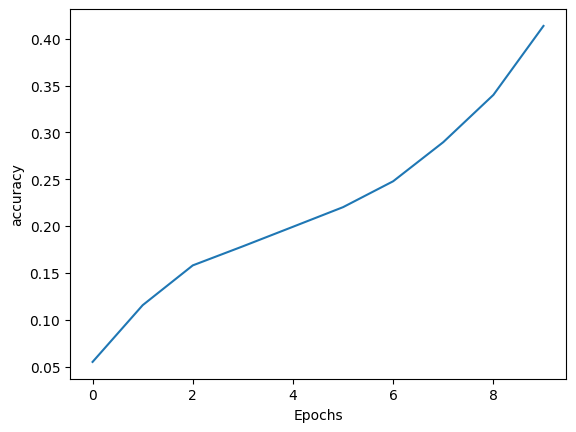

In [10]:
plot_graphs(history, 'accuracy')


In [12]:
seed_text = "محمد"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 33ms/step
محمد بن الحسين قال قال النبي صلى الله عليه وسلم «من
